In [1]:
from load_modules import * 

In [2]:
# file_location = "../../data/Raman_Mouse/preprocessed 2023-01-20 15-10-08.461978/"
file_location = "../../data/Raman_Mouse/raw/"

filenames = glob.glob(file_location+'/[!Wave|metadata]*.txt')

data = load_files([filenames], True)


start loading data, number of files 51
opening file 1 of 51: ../../data/Raman_Mouse/raw/Liver_map_150z25_60s_#12.txt
loaded  file 1 of 51: ../../data/Raman_Mouse/raw/Liver_map_150z25_60s_#12.txt
opening file 2 of 51: ../../data/Raman_Mouse/raw/Muscle_map_150z25_60s_#34.txt
loaded  file 2 of 51: ../../data/Raman_Mouse/raw/Muscle_map_150z25_60s_#34.txt
opening file 3 of 51: ../../data/Raman_Mouse/raw/Kidney_map_150z25_60s_#45.txt
loaded  file 3 of 51: ../../data/Raman_Mouse/raw/Kidney_map_150z25_60s_#45.txt
opening file 4 of 51: ../../data/Raman_Mouse/raw/Kidney_map_150z25_60s_#43.txt
loaded  file 4 of 51: ../../data/Raman_Mouse/raw/Kidney_map_150z25_60s_#43.txt
opening file 5 of 51: ../../data/Raman_Mouse/raw/Liver_map_150x25_60s_#13.txt
loaded  file 5 of 51: ../../data/Raman_Mouse/raw/Liver_map_150x25_60s_#13.txt
opening file 6 of 51: ../../data/Raman_Mouse/raw/Muscle_map_150z25_60s_#27.txt
loaded  file 6 of 51: ../../data/Raman_Mouse/raw/Muscle_map_150z25_60s_#27.txt
opening file 7 of

In [5]:
img, wavenumbers = data[0][0], data[1][0]
img = img.reshape(-1, img.shape[-1])

In [8]:
def median(values):
    return sorted(values)[len(values)//2]

In [38]:
threshold1 = lambda z : median(z) - np.min(z)
threshold2 = lambda z : np.mean(z) - np.min(z)
threshold3 = lambda z : np.max(z) - median(z)
threshold4 = lambda z : np.max(z) - np.mean(z)
threshold5 = lambda z : (np.max(z) - np.min(z))/2


labels = ["median-min", "mean-min", "max-median", "max-mean", "max-min"]
threshold = [threshold1, threshold2, threshold3, threshold4, threshold5]   

In [45]:
width = 20

mean_lst = []
std_lst = []
for s in img:
    t_lst = [[] for _ in threshold]
    for i in range(img.shape[1]-width):
        for ind,t in enumerate(threshold):
            t_lst[ind].append(t(s[i:i+width]))
#     for t in t_lst:
#         plt.plot(t)
#     plt.plot(s[width//2:-width//2]/10)
#     plt.legend(labels)
#     plt.show()
    
    mean_lst.append(np.mean(t_lst, 1))
    std_lst.append(np.std(t_lst, 1))


In [58]:
np.mean(mean_lst, 0), np.mean(std_lst, 0)

(array([65.77648903, 65.55072248, 75.44382435, 75.66959089, 70.61015669]),
 array([ 70.66497021,  72.68646658, 105.10205092, 100.65045227,
         85.64074625]))

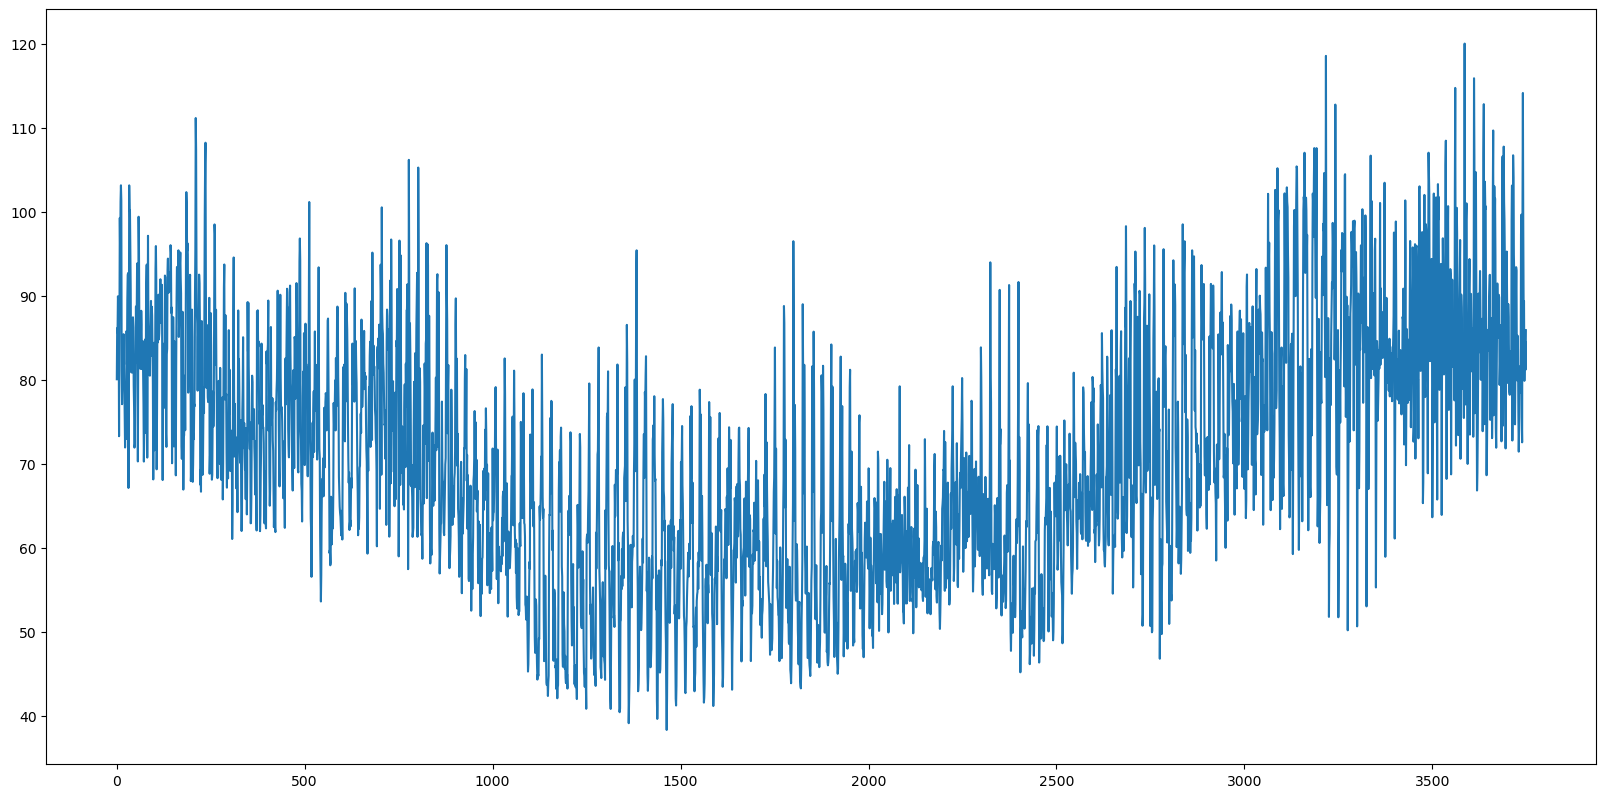

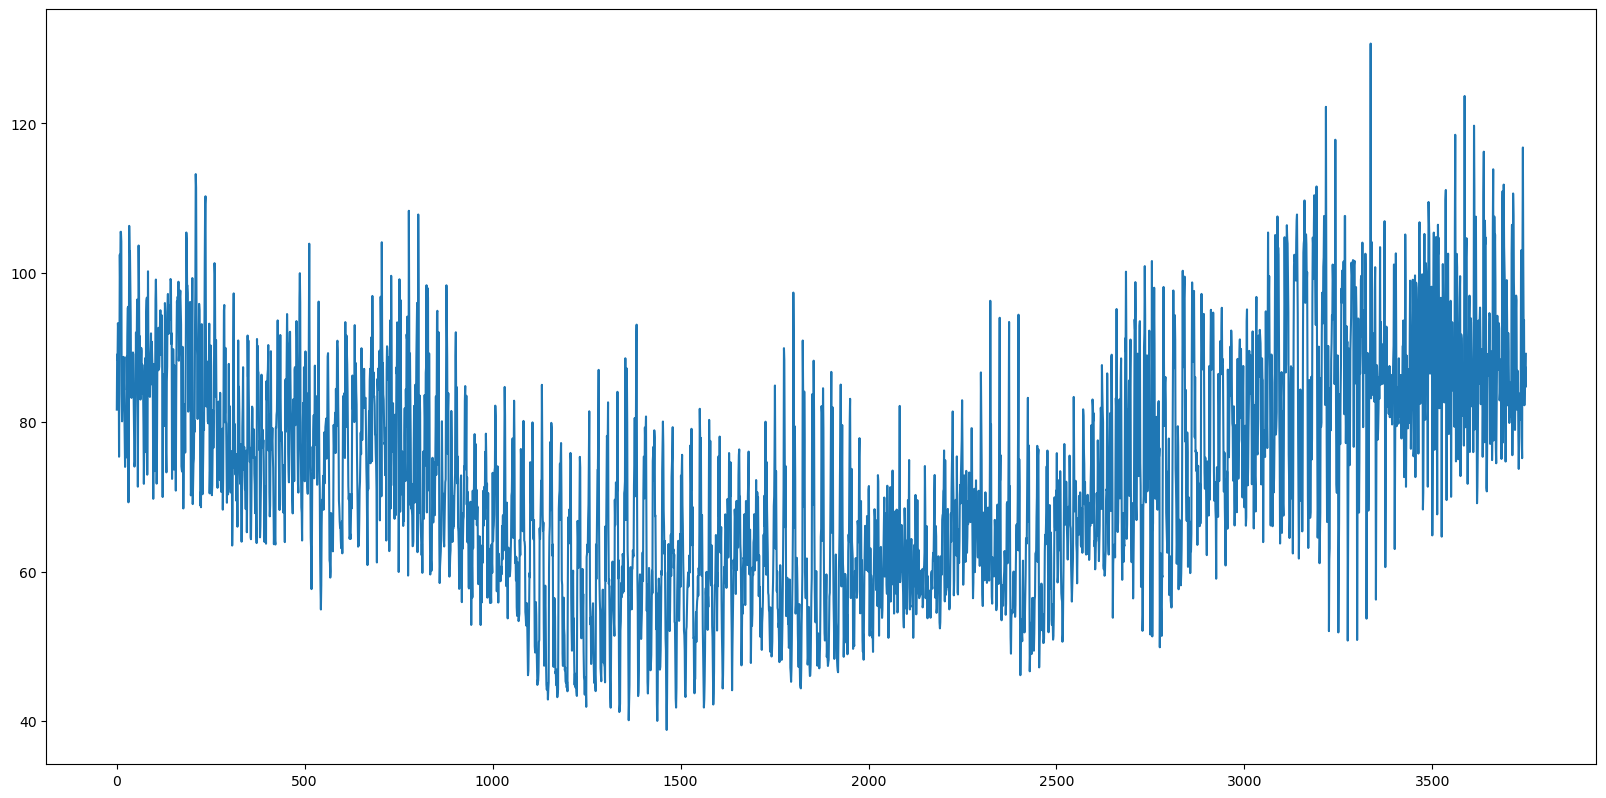

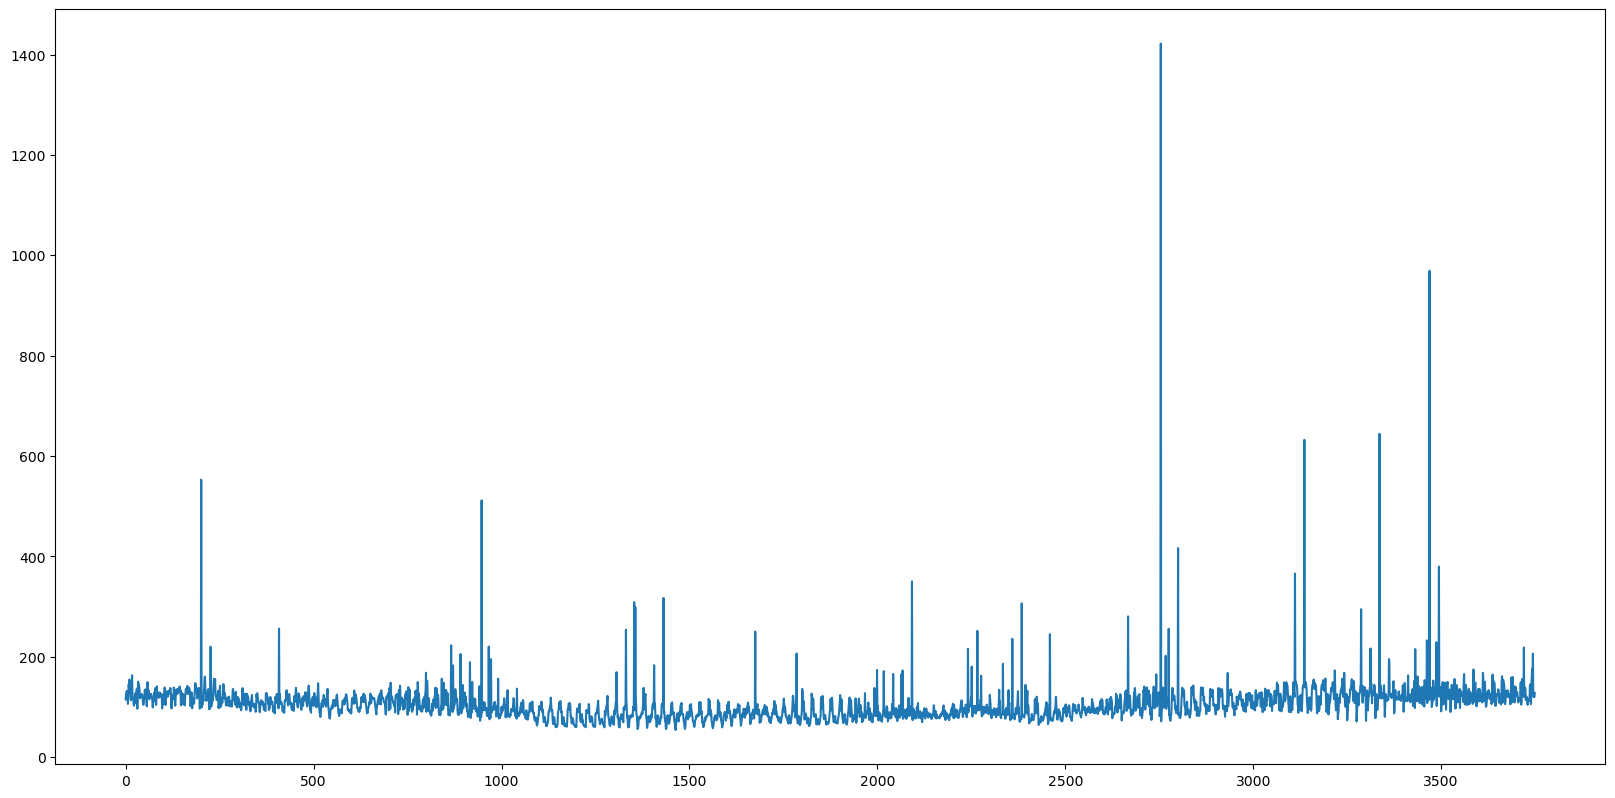

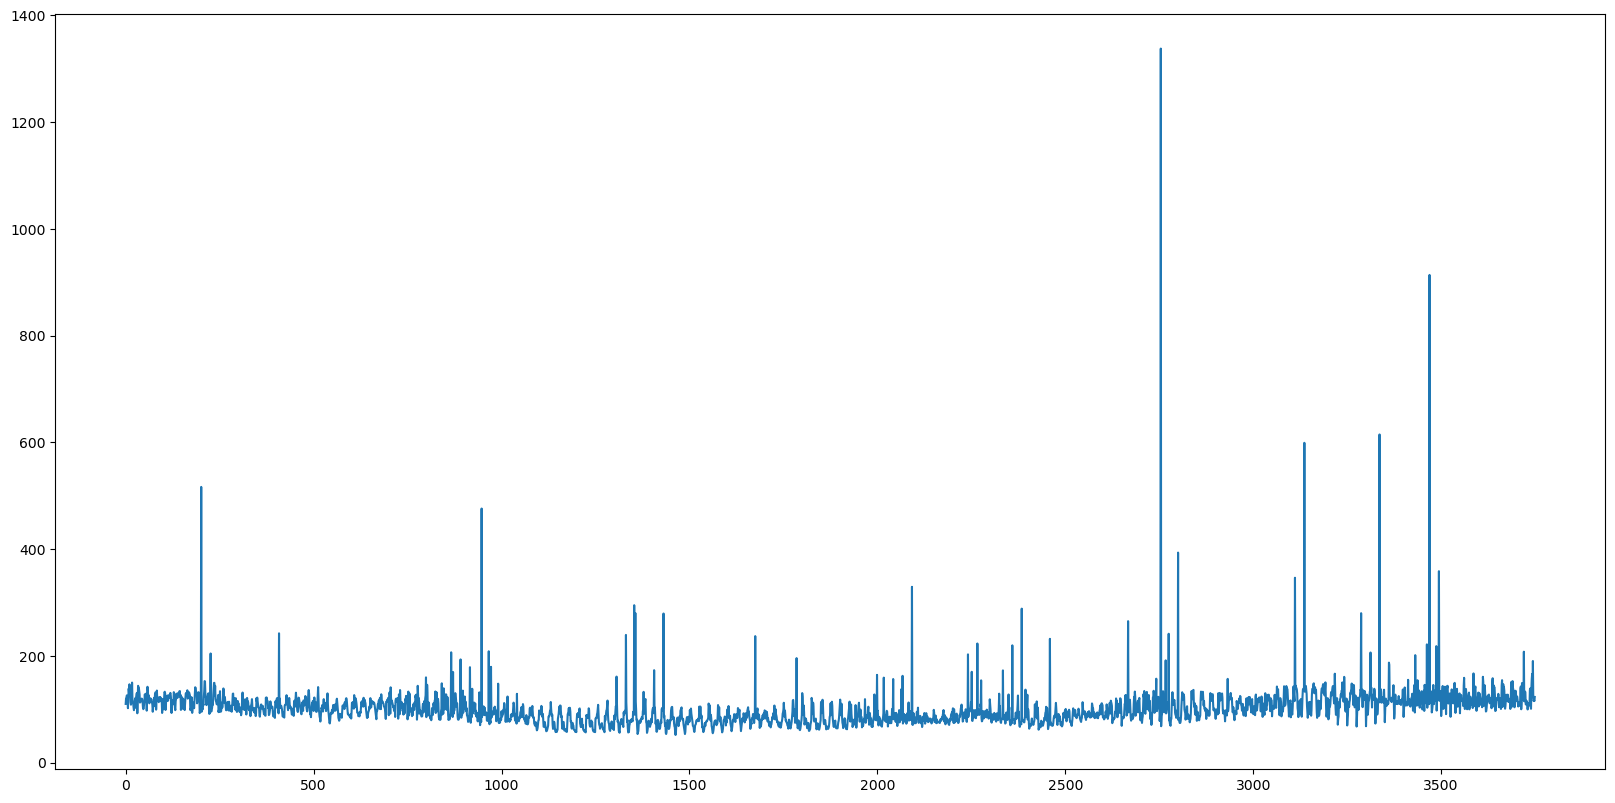

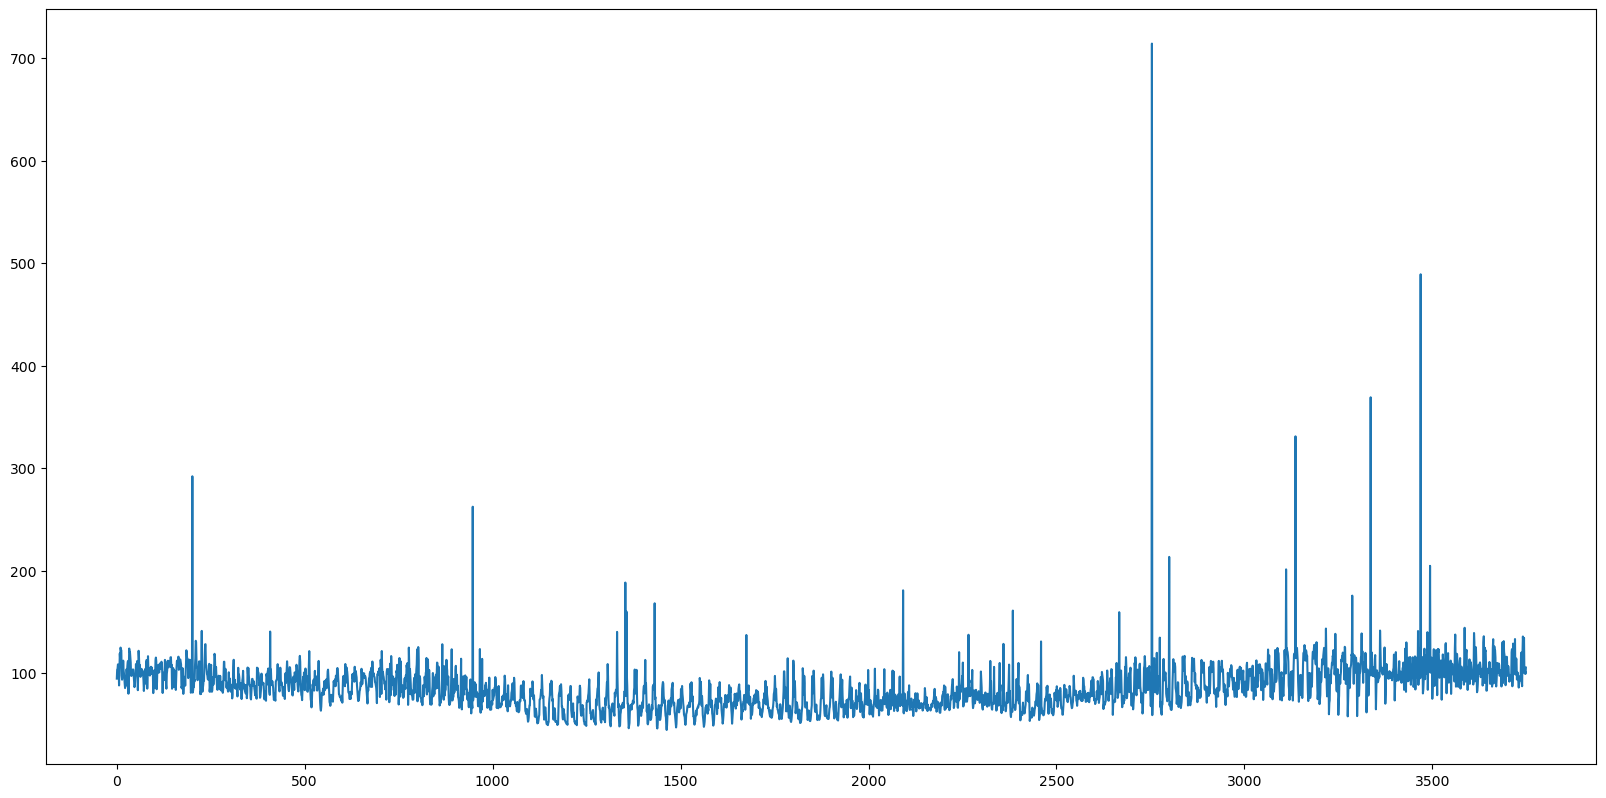

In [57]:
# plt.plot(img[0])

std_lst = np.array(std_lst)

plt.plot(std_lst[:,0])
plt.show()

plt.plot(std_lst[:,1])
plt.show()

plt.plot(std_lst[:,2])
plt.show()

plt.plot(std_lst[:,3])
plt.show()

plt.plot(std_lst[:,4])
plt.show()
# plt.plot(img[0])
# plt.plot(std_lst)
# plt.show()